# Part 6: SMOTE (Synthetic Minority Over-sampling Technique)
**Student:** Sandali (IT24103843)

✅ Dataset loaded successfully! Shape: (284807, 31)
🔹 Selected features based on MI > 0:


['V17',
 'V14',
 'V12',
 'V10',
 'V11',
 'V16',
 'V4',
 'V3',
 'V18',
 'V9',
 'V7',
 'V2',
 'V21',
 'V27',
 'V5',
 'V6',
 'V1',
 'Time',
 'V8',
 'V28',
 'V19',
 'Amount',
 'V20',
 'V23',
 'V24',
 'V26',
 'V25',
 'V13',
 'V22',
 'V15']

🔹 Applying SMOTE to balance the training set...


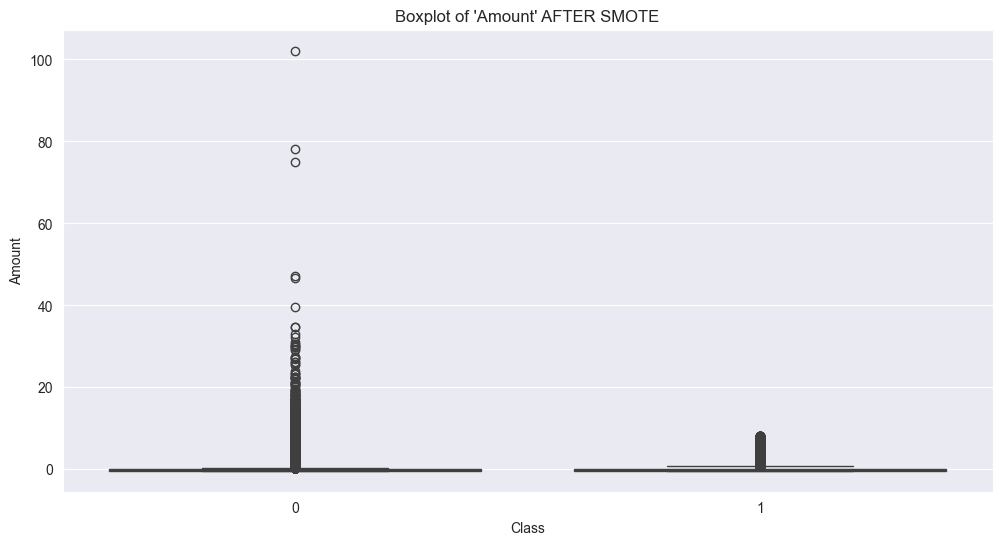

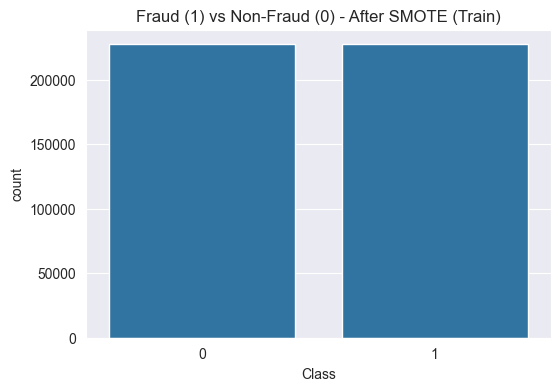

✅ SMOTE applied and visualizations saved successfully.


In [1]:
# ===============================
# SMOTE Oversampling & Visualization
# Author: Sandali / Nevin Nijanthan
# ===============================

# --- 1. Imports ---
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

# --- 2. Settings ---
members = {
    "Kishan Ahamed": "IT24103829",
    "Abhinaya Kumar": "IT24103851",
    "Lafry": "IT24103834",
    "Nevin Nijanthan": "IT24102335",
    "Indhuwara": "IT24103022",
    "Sandali": "IT24103843"
}

output_viz_path = "../results/eda_visualizations/"
if not os.path.exists(output_viz_path):
    os.makedirs(output_viz_path)

data_path = "../data/raw/creditcard.csv"

# --- 3. Load Dataset ---
try:
    df = pd.read_csv(data_path)
    print(f"✅ Dataset loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    print(f"❌ Error: {data_path} not found.")

# --- 4. Feature Selection using Mutual Information ---
if 'df' in locals():
    X_temp = df.drop('Class', axis=1)
    y_temp = df['Class']

    mi_scores = mutual_info_classif(X_temp, y_temp, random_state=42)
    mi_series = pd.Series(mi_scores, index=X_temp.columns).sort_values(ascending=False)
    selected_features = mi_series[mi_series > 0].index.tolist()

    print("🔹 Selected features based on MI > 0:")
    display(selected_features)

    X = df[selected_features]
    y = df['Class']

    # --- 5. Train-Test Split ---
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # --- 6. Feature Scaling ---
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

# --- 7. Apply SMOTE to Training Data ---
if 'X_train_scaled' in locals() and 'y_train' in locals():
    print("🔹 Applying SMOTE to balance the training set...")
    sm = SMOTE(random_state=42)
    X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

    train_res_df = pd.DataFrame(X_train_res, columns=X_train.columns)
    train_res_df['Class'] = y_train_res

    # --- 8. Visualization: Boxplot of 'Amount' After SMOTE ---
    plt.figure(figsize=(12,6))
    sns.boxplot(x='Class', y='Amount', data=train_res_df)
    plt.title("Boxplot of 'Amount' AFTER SMOTE")
    plt.show()
    plt.savefig(f"{output_viz_path}{members['Sandali']}_smote_boxplot_after.png")
    plt.close()

    # --- 9. Visualization: Class Distribution After SMOTE ---
    plt.figure(figsize=(6,4))
    sns.countplot(x=y_train_res)
    plt.title("Fraud (1) vs Non-Fraud (0) - After SMOTE (Train)")
    plt.show()
    plt.savefig(f"{output_viz_path}{members['Sandali']}_smote_class_distribution.png")
    plt.close()

    print("✅ SMOTE applied and visualizations saved successfully.")
